Proyecto Final

# **Comparacion de variables ambientales en observaciones de Anolis cristatellus en Costa Rica (introducido) y Puerto Rico (Nativo)**

### **Integrantes:**
#### **Jimmy Barrantes Madrigal**

### **Justificacion**

Anolis cristatellus, comúnmente conocido como el anolis cresta de Puerto Rico, es una especie de lagartija nativa de Puerto Rico y las Islas Vírgenes. Esta especie ha demostrado ser un invasor exitoso en varias regiones debido a su adaptabilidad a diferentes hábitats y su capacidad de coexistir con humanos.

Algunas de estas caracteristicas son:

Adaptabilidad Ecológica: A. cristatellus es capaz de vivir en una
variedad de hábitats, incluyendo áreas urbanas, bosques, y zonas costeras. Esta versatilidad le permite establecerse en nuevas áreas rápidamente.

Reproducción Rápida: Las hembras de esta especie ponen huevos continuamente durante la temporada de reproducción, lo que facilita un rápido incremento poblacional en nuevas áreas.

Competencia con Especies Nativas: A. cristatellus es agresivo y territorial, lo que puede desplazar a especies de anolis nativos al competir por recursos como alimento y hábitat.

Dispersión Humana: La capacidad de esta especie para ser transportada accidentalmente por humanos en cargamentos de plantas, vehículos, y otros medios facilita su dispersión a nuevas regiones.


Esta especie ha sido introducida en Costa Rica, donde podria tener un impacto potencial negativo en los ecosistema y especies nativas. Por ejemplo:
Competencia por Recursos: A. cristatellus puede competir directamente con especies de lagartos nativos de Costa Rica, como los anolis locales. Esta competencia puede resultar en la disminución de las poblaciones de especies nativas debido a la exclusión competitiva.

Depredación: Como insectívoro, A. cristatellus podría afectar las poblaciones de insectos locales, alterando las cadenas alimenticias y los equilibrios ecológicos.

Hibridación: En el caso de especies estrechamente relacionadas, existe la posibilidad de hibridación, lo que podría amenazar la pureza genética de las especies nativas.

Disminución de la Biodiversidad Nativa: La presencia de una especie invasora agresiva puede resultar en la disminución de la biodiversidad, especialmente si desplaza o lleva a la extinción a especies nativas.

Alteración de Ecosistemas: Cambios en la estructura de las comunidades de reptiles y sus interacciones con otras especies (como insectos y plantas) pueden tener efectos en cascada que alteren los ecosistemas de manera significativa.

La potencial invasión de Anolis cristatellus en Costa Rica representa una amenaza significativa para la biodiversidad y los ecosistemas locales. La combinación de su alta adaptabilidad, capacidad de reproducción rápida, y agresividad competitiva hace que esta especie sea una invasora formidable. Sin embargo, con medidas de control y prevención adecuadas, es posible mitigar sus impactos negativos y proteger la biodiversidad de Costa Rica.Por lo tanto conocer sobre su comportamiento y ecologia es indispensable.

### **Referencias**

Río, C. A. D., Kaiser, H., & Powell, R. (Eds.). (2021). Reptiles of the Caribbean: Evolution, ecology, and conservation. CRC Press.

Losos, J. B. (2009). Lizards in an Evolutionary Tree: Ecology and Adaptive Radiation of Anoles. University of California Press.

Kolbe, J. J., Glor, R. E., Schettino, L. R., Lara, A. C., Larson, A., & Losos, J. B. (2004). Genetic variation increases during biological invasion by a Cuban lizard. Nature, 431(7005), 177-181.

Powell, R., & Henderson, R. W. (2008). Island lists of West Indian amphibians and reptiles. Florida Museum of Natural History Bulletin, 47, 1-300.

Kraus, F. (2009). Alien Reptiles and Amphibians: A Scientific Compendium and Analysis. Springer.

Reaser, J. K., Meyerson, L. A., Cronk, Q., Poorter, M. D., Eldrege, L. G., Green, E., ... & Tye, A. (2007). Ecological and socioeconomic impacts of invasive alien species in island ecosystems. Environmental Conservation, 34(2), 98-111.

### **Objetivo**

Analizar las diferencias en variables ambientales entre los registros de Anolis cristatellus realizadas en Costa Rica donde es introducido y en Puerto Rico donde es nativo.

### **Datos utilizados**

Se utiliza datos de observaciones obtenidos de inaturalist para Costa Rica y para Puerto Rico. En ambos, se filtraron los datos para incluir unicamente las observaciones corroboradas de grado de investigacion.

Las variables ambientales de temperatura y precipitacion se encuentran en formato raster (.tif) y fueron tomadas de worldclim2. Estas representan datos historicos de temperatura y precipitacion desde 1970 - 2000 en una resolucion de 30s (aproximadamente 1km x 1km). https://worldclim.org/

Los datos sobre la huella humana son calculado con base en una serie de metricas que indican el nivel de alteracion antrópica del sitio. Donde valores bajos representan menor alteracion y valores altos mayor alteracion o impacto humano. Fueron tomados de https://wcshumanfootprint.org/

### **Codigo utilizado:**

**Instalar y cargar bibliotecas**

In [2]:
!pip install pandas
!pip install geodatasets
!pip install rasterio
!pip install seaborn

In [3]:
# Importar
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geodatasets
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

**Cargar datos a utilizar**

In [4]:
# Cargar datos de observaciones de A. cristatellus de Costa Rica
df = pd.read_csv("Obs CR.csv")
df.head(3) # Visualizar

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,place_county_name,place_state_name,place_country_name,place_admin1_name,place_admin2_name,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,1209672,2012-04-24,2012-04-24,NaN,Central America,63086,tierraiberica,Fundación Tierra Ibérica,2015-02-03 12:11:21 UTC,2020-09-08 02:37:10 UTC,...,Talamanca,Limón,Costa Rica,Limón,Talamanca,Crested Anole,Anolis cristatellus,Abaniquillo caribeño crestado,Reptilia,36488
1,5985223,2013/08/01 12:21 AM MDT,2013-08-01,2013-08-01 06:21:00 UTC,Mountain Time (US & Canada),457523,anthonywood,Tony Wood,2017-04-27 19:35:10 UTC,2019-11-28 21:33:29 UTC,...,Talamanca,Limón,Costa Rica,Limón,Talamanca,Crested Anole,Anolis cristatellus,Abaniquillo caribeño crestado,Reptilia,36488
2,7207922,2017-07-23 4:12:47 PM CDT,2017-07-23,2017-07-23 21:12:47 UTC,Central Time (US & Canada),19145,elfaulkner,Erin Faulkner,2017-07-25 21:42:05 UTC,2019-11-29 15:52:50 UTC,...,Talamanca,Limón,Costa Rica,Limón,Talamanca,Crested Anole,Anolis cristatellus,Abaniquillo caribeño crestado,Reptilia,36488


In [5]:
# Visualizar los elementos
df.describe()

,id,user_id,sound_url,num_identification_agreements,num_identification_disagreements,oauth_application_id,latitude,longitude,positional_accuracy,private_place_guess,private_latitude,private_longitude,public_positional_accuracy,place_town_name,taxon_id
count,2.110000e+02,2.110000e+02,0.0,211.000000,211.0,115.000000,211.000000,211.000000,171.000000,0.0,0.0,0.0,171.000000,0.0,211.0
mean,1.280081e+08,2.639961e+06,NaN,1.668246,0.0,14.052174,9.751635,-82.869179,1025.058480,NaN,NaN,NaN,1178.210526,NaN,36488.0
std,5.757071e+07,2.238018e+06,NaN,0.770829,0.0,60.813324,0.175232,0.257629,4994.444354,NaN,NaN,NaN,5493.639616,NaN,0.0
min,1.209672e+06,1.700000e+01,NaN,0.000000,0.0,2.000000,9.620746,-84.058282,2.000000,NaN,NaN,NaN,2.000000,NaN,36488.0
25%,1.006202e+08,7.461735e+05,NaN,1.000000,0.0,2.000000,9.654014,-82.849818,8.000000,NaN,NaN,NaN,8.000000,NaN,36488.0
50%,1.470057e+08,2.092466e+06,NaN,2.000000,0.0,3.000000,9.734786,-82.838850,42.000000,NaN,NaN,NaN,42.000000,NaN,36488.0
75%,1.770417e+08,4.438089e+06,NaN,2.000000,0.0,3.000000,9.740166,-82.747471,250.000000,NaN,NaN,NaN,250.000000,NaN,36488.0
max,2.184797e+08,7.893874e+06,NaN,4.000000,0.0,333.000000,10.575852,-82.640691,45264.000000,NaN,NaN,NaN,45264.000000,NaN,36488.0




### **1) Explorar el incremento de observaciones de A. cristatellus en Costa Rica a travez del tiempo**

In [6]:
# Como no se tiene un columna especifica para ano se debe crear una
df['date'] = pd.to_datetime(df['observed_on'])
df['year'] = df['date'].dt.year

df.year.head()

0    2012
1    2013
2    2017
3    2008
4    2008
Name: year, dtype: int32

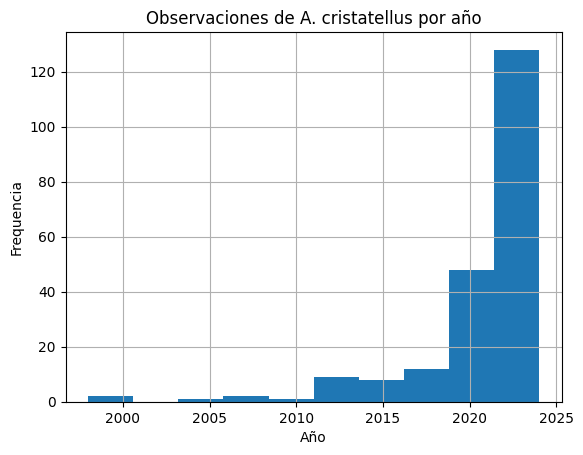

In [7]:
# Grafico de cantidad de observaciones de esta especie por año

df['year'].hist()

# Título del grafico
plt.title('Observaciones de A. cristatellus por año')
# Etiqueta del eje X
plt.xlabel('Año')
# Etiqueta del eje Y
plt.ylabel('Frequencia')

plt.show()


Como se muestra en el grafico, las observaciones de A. cristatellus han incrementado de manera exponencial a partir del año 2015 aproximadamente.

### **2) Visualizar los puntos en Costa Rica**

In [8]:
# Crear formato geodataframe con las coordenadas de los puntos
obs_points = gpd.points_from_xy(df.longitude, df.latitude)
obs_gdf = gpd.GeoDataFrame(df, geometry=obs_points)


<Axes: >

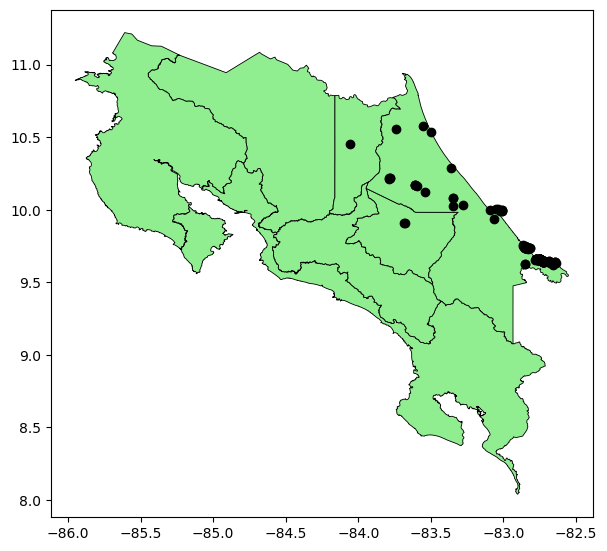

In [9]:
# Cargar capa de provincias de CR y graficar los puntos de observaciones sobre estas
provincias = gpd.read_file('cr_provinces.shp')
lienzo = provincias.plot(
    figsize = (7,7),
    color="lightgreen",
    edgecolor="black",
    linewidth = 0.6
)

obs_gdf.plot(ax=lienzo, color="black")

Las observaciones estan concentradas en la zona Caribe de Costa Rica. Principalmente en Limon.

###**3) Cargar las capas raster con informacion sobre temperatura, precipitacion y huella humana para extraer la informacion sobre los puntos de observaciones**

In [10]:
# Cargar las bibliotecas para trabajar con raster
import geopandas
import rasterio

<Axes: >

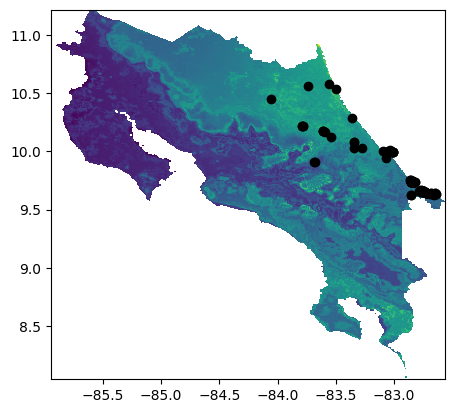

In [11]:
# Cargar raster de precipitacion, temperatura y huella humana
precipitacion = rasterio.open("cr_prec.tif")
temperatura = rasterio.open("cr_temp.tif")
huellaHumana = rasterio.open("cr_hf.tif")

# visualizar la capa de precipitacion
from rasterio.plot import show

# Crear los axis
fig, ax = plt.subplots()

# Tomar las coordenadas de extencion
extent = [precipitacion.bounds[0], precipitacion.bounds[2], precipitacion.bounds[1], precipitacion.bounds[3]]

#Generar el plot
raster_prec = rasterio.plot.show(precipitacion, extent=extent, ax=ax)

obs_gdf.plot(ax = raster_prec, color = "black")

In [12]:
# Extraer los valores del raster correspondiente a cada punto
coord_list = [(x, y) for x, y in zip(obs_gdf["geometry"].x, obs_gdf["geometry"].y)]
obs_gdf["prec"] = [x for x in precipitacion.sample(coord_list)]
obs_gdf["temp"] = [x for x in temperatura.sample(coord_list)]
obs_gdf["Huella_humana"] = [x for x in huellaHumana.sample(coord_list)]
obs_gdf[["prec", "temp", "Huella_humana"]]

,prec,temp,Huella_humana
0,[-32768],[-1000000000.0],[-32768]
1,[345],[25.8],[4057]
2,[345],[25.8],[3984]
3,[366],[25.8],[1788]
4,[-32768],[-1000000000.0],[3923]
...,...,...,...
206,[-32768],[-1000000000.0],[3687]
207,[423],[25.3],[3347]
208,[460],[25.3],[5500]
209,[460],[25.3],[5500]


Hay algunos datos parece tener valores atipicos debido a que la mayoria de observaciones son en la costa y algunos puntos caen en el mar, fuera de los limites del raster de donde se trata de obtener la informacion.



In [13]:
# primero pasar los datos a formato numerico, ya que se encuentran como objeto
obs_gdf["prec"] = obs_gdf["prec"].values.astype(float)
obs_gdf["temp"] = obs_gdf["temp"].values.astype(float)
obs_gdf["Huella_humana"] = obs_gdf["Huella_humana"].values.astype(float)

# Revisar la estructura de los datos
obs_gdf[["prec", "temp", "Huella_humana"]].describe()

<ipython-input-13-5176b32626d7>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  obs_gdf["prec"] = obs_gdf["prec"].values.astype(float)
<ipython-input-13-5176b32626d7>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  obs_gdf["temp"] = obs_gdf["temp"].values.astype(float)
<ipython-input-13-5176b32626d7>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  obs_gdf["Huella_humana"] = obs_gdf["Huella_humana"].values.astype(float)


,prec,temp,Huella_humana
count,211.000000,2.110000e+02,211.000000
mean,-12362.492891,-3.838862e+08,-8834.843602
std,16145.461512,4.874873e+08,17470.511826
min,-32768.000000,-1.000000e+09,-32768.000000
25%,-32768.000000,-1.000000e+09,-32768.000000
50%,342.000000,2.560000e+01,3347.000000
75%,345.000000,2.575000e+01,4219.000000
max,460.000000,2.580000e+01,5800.000000


In [14]:
# Excluir valores atipicos, estos valores son de numero mayores a 10000
obs_original = obs_gdf.copy()
obs_gdf = obs_gdf[(obs_gdf['temp'] > -10000) & (obs_gdf['prec'] > -10000) & (obs_gdf['Huella_humana'] > -10000)]

obs_gdf[["prec", "temp", "Huella_humana"]].describe()


,prec,temp,Huella_humana
count,106.000000,106.000000,106.000000
mean,355.575472,25.581132,3941.905660
std,35.867202,0.550863,1155.942308
min,266.000000,21.900000,498.000000
25%,343.000000,25.600000,3748.750000
50%,345.000000,25.700001,4219.000000
75%,369.000000,25.799999,4682.000000
max,460.000000,25.799999,5800.000000


### **4) Cargar datos de Puerto Rico**

El objetivo de este trabajo es comparar los datos de observaciones de A. cristatellus en Costa Rica, con respecto a su lugar nativo en Puerto Rico.
Por lo tanto, vamos a cargar las observaciones de Puerto Rico y obtener una tabla con los valores de las variables ambientales para las observaciones de esta Isla.

In [15]:
dfPR = pd.read_csv("Obs PR.csv")

# Crear formato geodataframe con las coordenadas de los puntos
PR_points = gpd.points_from_xy(dfPR.longitude, dfPR.latitude)
obs_PR = gpd.GeoDataFrame(dfPR, geometry = PR_points)

# Cargar raster de precipitacion, temperatura y huella humana
prec_pr = rasterio.open("pr_prec.tif")
temp_pr = rasterio.open("pr_temp.tif")
huellaHumana_pr = rasterio.open("pr_hf.tif")

# Extraer los valores del raster correspondiente a cada punto
coord_list = [(x, y) for x, y in zip(obs_PR["geometry"].x, obs_PR["geometry"].y)]
obs_PR["prec"] = [x for x in prec_pr.sample(coord_list)]
obs_PR["temp"] = [x for x in temp_pr.sample(coord_list)]
obs_PR["Huella_humana"] = [x for x in huellaHumana_pr.sample(coord_list)]
obs_PR[["prec", "temp", "Huella_humana"]]

# Cambiar a valores numericos
obs_PR["prec"] = obs_PR["prec"].values.astype(float)
obs_PR["temp"] = obs_PR["temp"].values.astype(float)
obs_PR["Huella_humana"] = obs_PR["Huella_humana"].values.astype(float)

# Excluir valores atipicos
obs_PR = obs_PR[(obs_PR['temp'] > -10000) & (obs_PR['prec'] > -10000) & (obs_PR['Huella_humana'] > -10000)]

obs_PR[["prec", "temp", "Huella_humana"]].describe()

<ipython-input-15-b799190430ce>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  obs_PR["prec"] = obs_PR["prec"].values.astype(float)
<ipython-input-15-b799190430ce>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  obs_PR["temp"] = obs_PR["temp"].values.astype(float)
<ipython-input-15-b799190430ce>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  obs_PR["Huella_humana"] = obs_PR["Huella_humana"].values.astype(float)


,prec,temp,Huella_humana
count,3026.000000,3026.000000,3026.000000
mean,176.769332,23.066358,3903.152346
std,27.082543,1.600466,1209.617203
min,84.000000,17.299999,403.000000
25%,164.000000,21.799999,3052.000000
50%,184.000000,23.700001,4111.000000
75%,192.000000,24.400000,4865.000000
max,241.000000,24.900000,6246.000000


Seleccionaremos solo las columnas que se necesitan

In [16]:
# columnas necesarias
columnas = ["place_country_name", "prec", "temp", "Huella_humana"]

# Crear data frame de Costa Rica y de Puerto Rico con solamenta las columnas seleccionadas
costarica = obs_gdf[columnas]
puertorico = obs_PR[columnas]

# Unir las data frames en una sola
full_df = pd.concat([costarica, puertorico])

# Estandarizar los datos mediante un escalamiento a valores de z

full_df['prec'] = (full_df['prec'] - full_df['prec'].mean()) / full_df['prec'].std()
full_df['temp'] = (full_df['temp'] - full_df['temp'].mean()) / full_df['temp'].std()
full_df['Huella_humana'] = (full_df['Huella_humana'] - full_df['Huella_humana'].mean()) / full_df['Huella_humana'].std()

full_df[["prec", "temp", "Huella_humana"]].describe()

,prec,temp,Huella_humana
count,3.132000e+03,3.132000e+03,3.132000e+03
mean,-8.167158e-17,3.085371e-16,1.179701e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.330823e+00,-3.566507e+00,-2.899324e+00
25%,-4.203293e-01,-7.627783e-01,-6.748163e-01
50%,5.139743e-02,4.562342e-01,1.722605e-01
75%,2.400881e-01,7.609874e-01,7.928706e-01
max,6.537641e+00,1.614296e+00,1.938867e+00


Comparar las diferencias entre las observaciones de Costa Rica y Puerto Rico

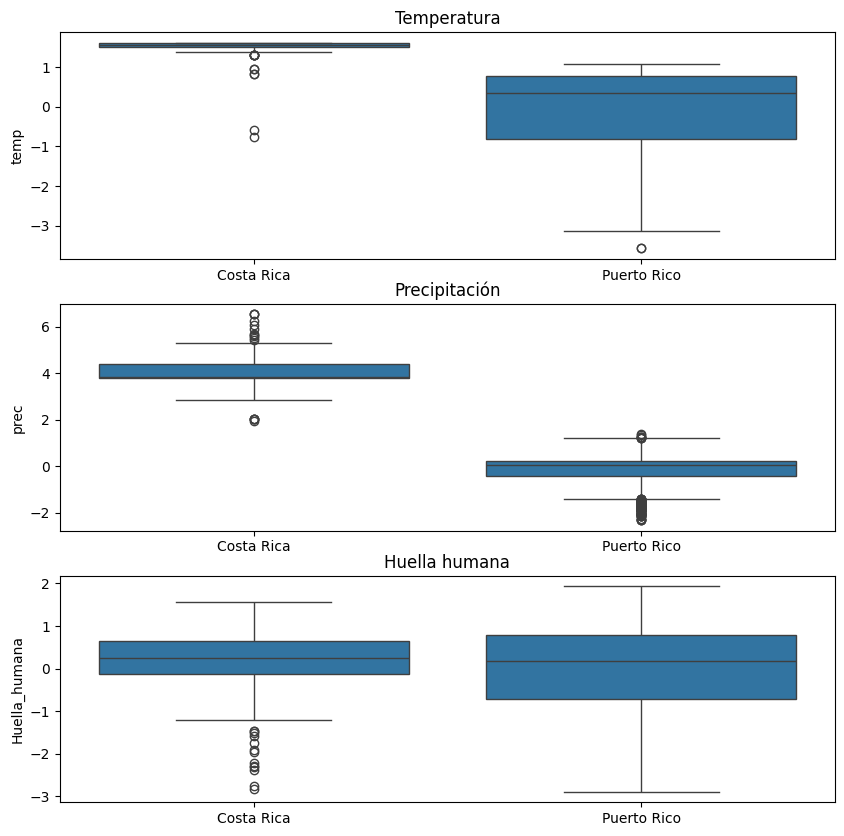

In [17]:
# Graficar la dispersion de las variables de temperatura, precipitacion y huella humana para cada sitio

# Ajusta la vista y ejes para graficar, en este caso 3 graficos en 1 columna
fig, axs = plt.subplots(3, 1, figsize=(10, 10))


# Crear un boxplot para cada variable comparando por sitio
sns.boxplot(x="place_country_name", y="temp", data=full_df, ax=axs[0])
sns.boxplot(x="place_country_name", y="prec", data=full_df, ax=axs[1])
sns.boxplot(x="place_country_name", y="Huella_humana", data=full_df, ax=axs[2])

# Remover el titulo del eje x de los subplots por estetica
axs[0].set_xlabel("")
axs[1].set_xlabel("")
axs[2].set_xlabel("")

# Título de los ejes
axs[0].set_title("Temperatura")
axs[1].set_title("Precipitación")
axs[2].set_title("Huella humana")

plt.show()

Las observaciones en Costa Rica parecen presentar diferencias con respecto a Puerto Rico con respecto a Temperatura y Precipitacion. Mas no así con respecto a Huella humana.

### **5) Graficar un PCA para analizar las diferencias en las variables ambientales entre las observaciones de A. cristatellus de un pais y otro.**

In [18]:
# seleccionar unicamente las variables numericas, es decir, excluyendo la variable con el nombre del pais
# se guarda la nueva tabla con el nombre de dfc
X_zscaled = full_df.drop('place_country_name', axis='columns', inplace=False)

# Se calcula los auto-valores y auto-vectores de la matriz de covarianza
eigenvalues, eigenvectors = np.linalg.eig(X_zscaled.cov())

# Se normalizan los datos
eigenvalues_normalized = eigenvalues / eigenvalues.sum()

# Se calcula la varianza explicada
# Devuelve la suma acumulativa de los elementos a lo largo de un eje dado.
cumvar_explained = np.cumsum(eigenvalues_normalized)

print("Auto-valores:")
print(eigenvalues)

print("Auto-vectores:")
print( eigenvectors)

print("Auto-valores normalizados:")
print(eigenvalues_normalized)

print("Varianza explicada acumulada:")
print( cumvar_explained )

Auto-valores:
[0.52869924 1.05180975 1.41949101]
Auto-vectores:
[[-0.31940131  0.94538323  0.06506414]
 [ 0.67648767  0.1793957   0.71426999]
 [-0.66358665 -0.27215386  0.69683932]]
Auto-valores normalizados:
[0.17623308 0.35060325 0.47316367]
Varianza explicada acumulada:
[0.17623308 0.52683633 1.        ]


In [19]:
# Preparar los datos para graficar el pca

df_pca = pd.DataFrame(full_df)

# Agregar una variable numerica con las categorias de pais
df_pca['target'] = df_pca["place_country_name"].astype('category').cat.codes

# Crear un dataframe Y con la categoría numerica de pais
Y = pd.DataFrame(df_pca.target, columns=['target'])

# Guardar las categorias de pais
nombre_pais = np.array(['Costa Rica', 'Puerto Rico'])

# Asociar la categoria numerica con el nombre de pais
Y['country'] = Y.apply(lambda r: nombre_pais[r])

Y

,target,country
1,0,Costa Rica
2,0,Costa Rica
3,0,Costa Rica
5,0,Costa Rica
6,0,Costa Rica
...,...,...
3528,1,Puerto Rico
3529,1,Puerto Rico
3530,1,Puerto Rico
3531,1,Puerto Rico


In [20]:
# Proyecta los datos
T = pd.DataFrame(X_zscaled.dot(eigenvectors))
T
# Nombres de columnas
T.columns = ['pc1', 'pc2', 'pc3']

# agrega la etiqueta de las especies
T = pd.concat([T, Y.country], axis=1)

X_anolis_pca = T.iloc[:, 0:2]
print(X_anolis_pca)



           pc1       pc2
1    -0.213541  3.871514
2    -0.173429  3.887965
3     0.875006  4.851099
5    -0.302555  3.835007
6    -0.302555  3.835007
...        ...       ...
3528 -0.103424 -0.036320
3529 -0.103424 -0.036320
3530 -0.103424 -0.036320
3531  0.665816 -1.032015
3532  0.665816 -1.032015

[3132 rows x 2 columns]


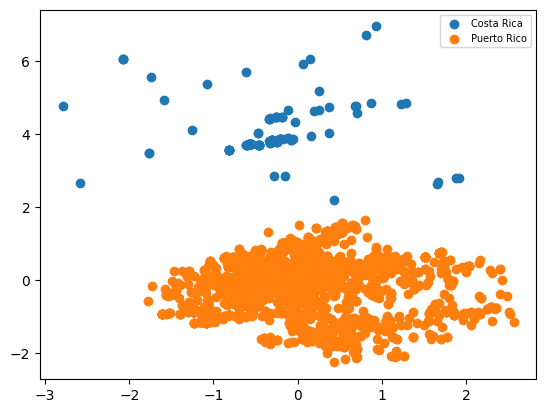

In [21]:
# Plot samples per class
X_anolis_pca_np = X_anolis_pca.to_numpy()
y_anolis_np = np.squeeze(Y.iloc[:, 0:1].to_numpy())


# create scatter plot for samples from each class
for class_value in range(2):
   # get row indexes for samples with this class
   row_ix = np.where(y_anolis_np == class_value)
   # create scatter of these samples
   plt.scatter(X_anolis_pca_np[row_ix, 0], X_anolis_pca_np[row_ix, 1])
   plt.legend(labels = nombre_pais, fontsize=7)

# show the plot
plt.show()

Se puede apreciar que el PCA muestra una separacion las observaciones de Costa Rica y las de Puerto Rico

## **Conclusiones**

*   Las observaciones de A. cristatellus han incrementado de manera exponencia durante la ultima decada (2014-2024) en Costa Rica

*   Se han concentrado principalmente en el principalmente en la region Caribe.

*   Se aprecia diferencias en las variables ambientales de las observaciones registradas en Costa Rica y las registradas en Puerto Rico.


*   Las principales diferencias entre las variables ambientales de las observaciones de Costa Rica y Puerto Rico se encuentran en la temperatura y la precipitacion (Mayor temperatura y precipitacion registrado en Costa Rica). Mientras que la tolerancia a impacto humano parece ser muy similar en ambos paises.



